<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/5_4%20%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A6%9D%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip = True,
                                   shear_range=0.5,
                                   brightness_range=[0.5,1.5],
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=30,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 하니.jpg to 하니.jpg


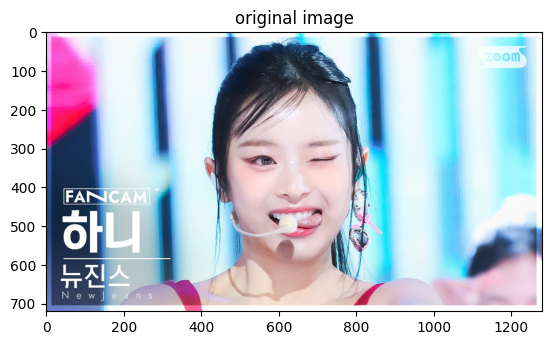

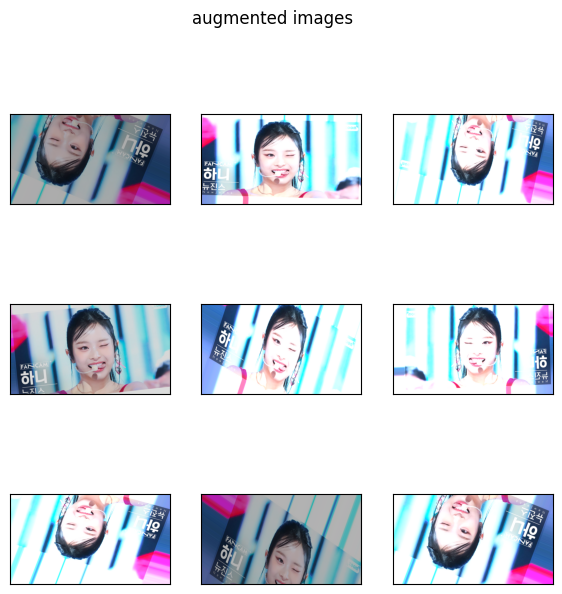

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

test_image = img_to_array(load_img('/content/하니.jpg')).astype(np.uint8)
plt.figure()
plt.title('original image')
plt.imshow(test_image)

# 제네레이터를 사용해서 이미지를 변환합니다
test_image = test_image.reshape((1,) + test_image.shape)
test_generator = train_datagen.flow(test_image, batch_size=1)

fig = plt.figure(figsize=(7,7))
fig.suptitle('augmented images')

for i in range(9):
  data = next(test_generator)
  image = data[0]
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image, dtype=np.uint8))


plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip = True,
                                   shear_range=0.5,
                                   brightness_range=[0.5,1.5],
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range=30,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size)



In [ ]:
# 모델 구성, 드롭아웃
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Dropout(0,2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Dropout(0,2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0,2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu',))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(train_generator,
                    epochs=100,
                    batch_size=32,
                    validation_data=val_generator)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - acc: 0.2498 - loss: 2.2584 - val_acc: 0.4033 - val_loss: 1.6026
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - acc: 0.3951 - loss: 1.6532 - val_acc: 0.4611 - val_loss: 1.4554
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - acc: 0.4329 - loss: 1.5564 - val_acc: 0.4932 - val_loss: 1.4065
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - acc: 0.4674 - loss: 1.4734 - val_acc: 0.5229 - val_loss: 1.3064
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - acc: 0.4936 - loss: 1.4075 - val_acc: 0.5408 - val_loss: 1.2753
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - acc: 0.5013 - loss: 1.3760 - val_acc: 0.5300 - val_loss: 1.3392
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - acc: 0.5182 - loss: 1.3462 - val_acc: 0.5601 - val_loss: 1.2206
Epoch 8/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - acc: 0.5303 - loss: 1.3193 - val_acc: 0.5279 - val_loss: 1.3672
Epoch 9/100
1094/1094 ━━━━━━

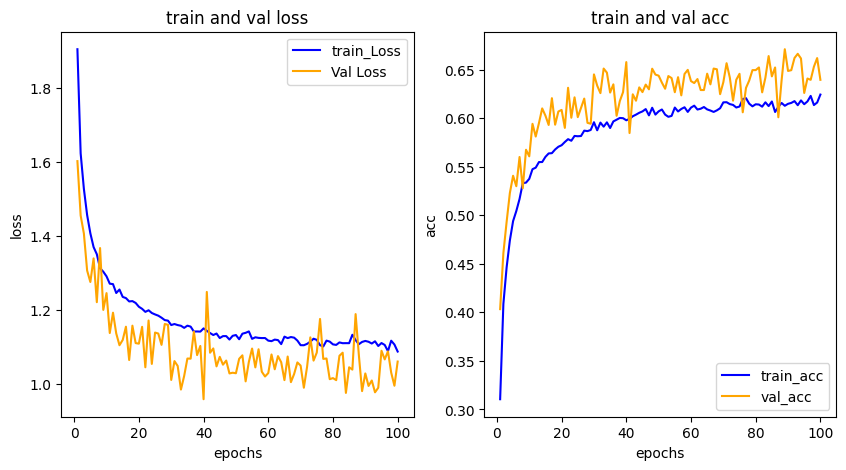

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 모델 구성, 드롭아웃
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    batch_size=32,
                    validation_data=val_generator)

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - acc: 0.6630 - loss: 0.9623 - val_acc: 0.6958 - val_loss: 0.8873
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - acc: 0.6855 - loss: 0.9037 - val_acc: 0.6703 - val_loss: 0.9600
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - acc: 0.6928 - loss: 0.8762 - val_acc: 0.6973 - val_loss: 0.8882
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - acc: 0.7001 - loss: 0.8579 - val_acc: 0.7433 - val_loss: 0.7556
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - acc: 0.7119 - loss: 0.8247 - val_acc: 0.7420 - val_loss: 0.7604
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - acc: 0.7101 - loss: 0.8288 - val_acc: 0.7135 - val_loss: 0.8374
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - acc: 0.7256 - loss: 0.7828 - val_acc: 0.7449 - val_loss: 0.7532
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - acc: 0.7350 - loss: 0.7696 - val_acc: 0.7724 - val_loss: 0.6537
Epoch 9/30
1094/1094 ━━━

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()